# Counts Analysis with Recidivism Associations

Co-occurrence of terms analysis: check how often pre-selected recidivism terms appear in abstracts with risk factor terms. 

This analysis searches through PubMed for papers that contain specified risk factors and selected association terms.

Data extracted is the count of the number of papers with both terms. This is used to infer the associated terms for each risk factor.

This notebook covers the recidivism-related association terms.

In [96]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import normaltest, spearmanr

from lisc import Counts
from lisc.utils import SCDB, load_object
from lisc.io import load_txt_file
from lisc.plts.counts import plot_matrix, plot_clustermap, plot_dendrogram

In [97]:
import seaborn as sns
sns.set_context('talk')

In [98]:
# Import custom project code
import sys
sys.path.append('../code')
from plts import plot_count_hist, plot_time_associations, plot_latency_values
from analysis import get_time_associations

## Setup

In [99]:
# Notebook settings
SAVE_FIG = True
SAVE_EXT = '.pdf'

# Set some plot settings for when saving out
#   This is because changing these looks a bit odd in the notebook
matrix_linewidths = 0.35 if SAVE_FIG else 0

In [100]:
# Analysis settings
# Minimum number of articles a risk factor must have to be represented

N_RISK_FACTORS = 1000  

In [101]:
# Set the file locations
from lisc.utils import SCDB
term_dir = '../terms/'
figs_dir = '../data/figures/counts'
db = SCDB('../')

In [102]:
# Set the name of the file to load
name = 'recidivism'

In [103]:
import os
print(os.getcwd())


/Users/davidgallardo-pujol/Documents/GitHub/ViolentRiskFactors/notebooks


In [104]:
# Load the counts object
counts = load_object('counts_' + name, directory=db)

### Check Database Information

Check the metadata about the data collection, including checking the database data were collected from.

In [105]:
# Check database information
counts.meta_data.db_info

{'dbname': 'pubmed',
 'menuname': 'PubMed',
 'description': 'PubMed bibliographic record',
 'dbbuild': 'Build-2025.02.07.23.11',
 'count': '38371236',
 'lastupdate': '2025/02/07 23:11'}

In [106]:
# Check requester details
counts.meta_data.requester

{'n_requests': 435,
 'wait_time': 0.3333333333333333,
 'start_time': '22:29:33 Saturday 08 February 2025',
 'end_time': '22:36:46 Saturday 08 February 2025',
 'logging': None}

## Collection Summaries

### Risk Factor Articles

In [107]:
# Check the total number of risk factor papers
print('The total # of risk factor papers is: \t {:.0f}'.format(sum(counts.terms['A'].counts)))


The total # of risk factor papers is: 	 5085188


Test for normality (log-spaced) 	 t-val: 4.58 	 p-val 0.10


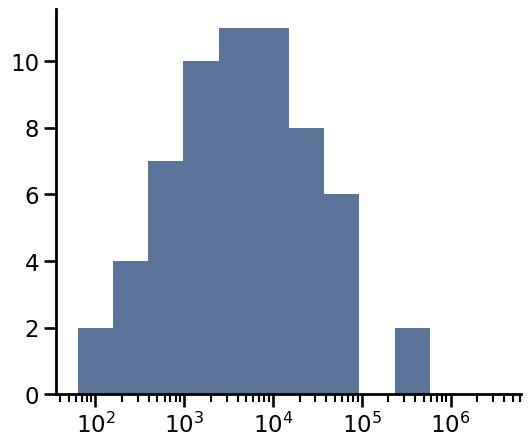

In [108]:
# Check the distribution of risk factor papers
print('Test for normality (log-spaced) \t t-val: {:1.2f} \t p-val {:1.2f}'.format(\
      *normaltest(np.log10(counts.terms['A'].counts))))
import os
if not os.path.exists(figs_dir):
    os.makedirs(figs_dir)

plot_count_hist(counts.terms['A'].counts, bins=12,
                save_fig=SAVE_FIG, file_name='riskfactor_hist' + SAVE_EXT,
                directory=figs_dir, save_kwargs={'transparent' : True})

### Association Articles

In [109]:
# Check the total number of association papers
print('The total # of association papers is: \t {:.0f}'.format(sum(counts.terms['B'].counts)))

The total # of association papers is: 	 13757


The total # of association papers is: 	 13757
Not enough samples to perform normality test (requires at least 8).


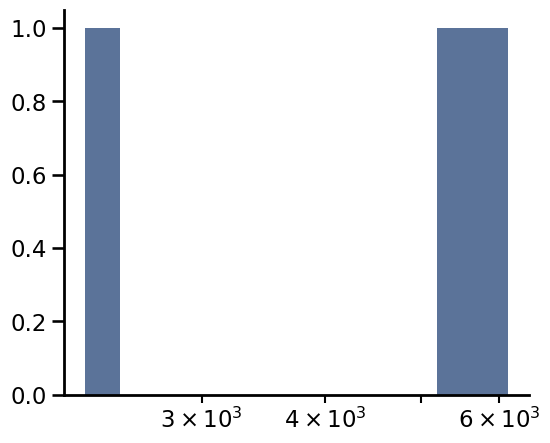

In [110]:
# Check the total number of association papers
print('The total # of association papers is: \t {:.0f}'.format(sum(counts.terms['B'].counts)))

# Check the distribution of association papers
if len(counts.terms['B'].counts) >= 8:
    print('Test for normality (log-spaced) \t t-val: {:1.2f} \t p-val {:1.2f}'.format(\
          *normaltest(np.log10(counts.terms['B'].counts))))
else:
    print("Not enough samples to perform normality test (requires at least 8).")

plot_count_hist(counts.terms['B'].counts, bins=12,
                save_fig=SAVE_FIG, file_name=name + '_assoc_hist' + SAVE_EXT,
                directory=figs_dir, save_kwargs={'transparent' : True})


### Co-occurence Numbers

In [111]:
# Check how many co-occurence values are zero
n_coocs = np.multiply(*counts.counts.shape)
n_zero = sum(np.ravel(counts.counts) == 0)
percent_zero = (n_zero / n_coocs) * 100

In [112]:
# Print out completeness of the co-occurence matrix
print('Percent zero: \t\t% {:4.2f}'.format(percent_zero))
print('Percent non-zero: \t% {:4.2f}'.format(100 - percent_zero))

Percent zero: 		% 17.20
Percent non-zero: 	% 82.80


In [113]:
# Print out summaries of the co-occurence data
print('The total number of cooc values is: \t{:d}'.format(sum(np.ravel(counts.counts))))
print('The median number of cooc values is: \t{:2.2f}'.format(np.median(np.ravel(counts.counts))))

The total number of cooc values is: 	13585
The median number of cooc values is: 	7.50


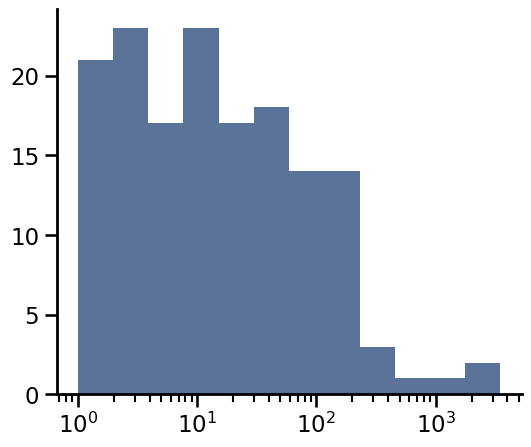

In [114]:
# Plot the distribution of (non-zero) co-occurence values
plot_count_hist(np.ravel(counts.counts), bins=12, log=True)

# Check Counts

In [115]:
# Check the terms with the most papers
counts.check_top(dim='A')
counts.check_top(dim='B')

The most studied term is  'Deviant sexuality'  with  3641877  articles.
The most studied term is  'sexual recidivism'  with  6120  articles.


In [116]:
# Check how many papers were found for each risk factor term
counts.check_counts(dim='A')

The number of documents found for each search term is:
  'Single-parent family'              -       232
  'Two-parent family'                 -      1208
  'Extended family'                   -      2222
  'Divorced parents'                  -       495
  'Stable family'                     -       545
  'Parental conflict'                 -      1223
  'Lack of supervision'               -       712
  'Emotional support'                 -     13215
  'Family abuse'                      -       843
  'External abuse'                    -      9873
  'Low income'                        -     74226
  'Large family'                      -      7408
  'Antisocial thoughts'               -       974
  'Moral reasoning'                   -      1875
  'Individualistic attitudes'         -      4431
  'Prosocial attitudes'               -      3108
  'Antisocial attitudes'              -       139
  'Self-preservation beliefs'         -      1591
  'Prosocial beliefs'                 -      

In [117]:
# Check how many papers were found for each association term
counts.check_counts(dim='B')

The number of documents found for each search term is:
  'violent recidivism'   -   2286
  'general recidivism'   -   5351
  'sexual recidivism'    -   6120


In [118]:
# Check the most commonly associated association term for each risk factor
counts.check_data()

For  'Single-parent family'             the highest association is  'violent recidivism'  with           1
For  'Two-parent family'                the highest association is  'violent recidivism'  with           2
For  'Extended family'                  the highest association is  'violent recidivism'  with           2
For  'Divorced parents'                 the highest association is  'general recidivism'  with           1
For  'Stable family'                    the highest association is  'violent recidivism'  with           2
For  'Parental conflict'                the highest association is  'violent recidivism'  with           2
For  'Lack of supervision'              the highest association is  'general recidivism'  with           2
For  'Emotional support'                the highest association is  'sexual recidivism'   with          11
For  'Family abuse'                     the highest association is  'general recidivism'  with           8
For  'External abuse'                

In [119]:
# Check the most commonly associated risk factor for each term
counts.check_data(dim='B')

For  'violent recidivism'  the highest association is  'Deviant sexuality'                with        1426
For  'general recidivism'  the highest association is  'Deviant sexuality'                with        2347
For  'sexual recidivism'   the highest association is  'Deviant sexuality'                with        3495


## Select risk factors with enough articles

In [120]:
# Check how many risk factors currently
counts.terms['A'].n_terms

62

In [121]:
# Drop ERPs without a target number of articles
counts.drop_data(N_RISK_FACTORS, dim='A')
print(counts.terms['A'].n_terms)

49


## Group Level Plots

In [122]:
# Compute the normalized score (percent association)
counts.compute_score('normalize', dim='A')

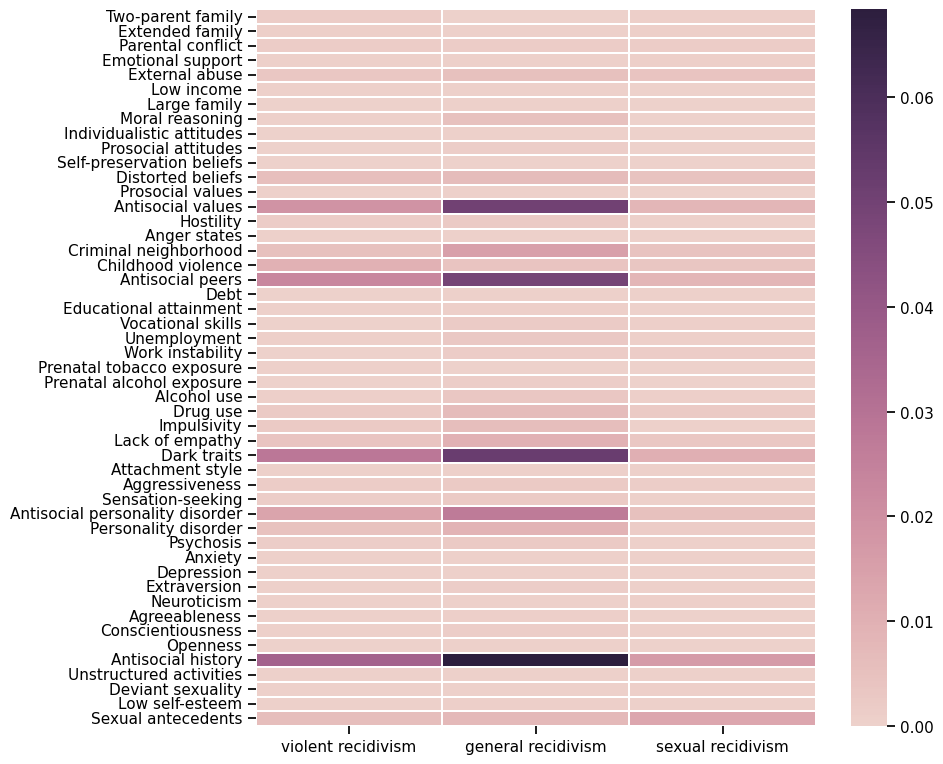

In [123]:
# Plot the matrix of percent associations - risk factors & terms
plot_matrix(counts, linewidths=matrix_linewidths, figsize=(10, 8),
            save_fig=SAVE_FIG, file_name=name + '_associations' + SAVE_EXT,
            directory=figs_dir, save_kwargs={'transparent' : True})

NaN en la matriu? False
Inf en la matriu? False


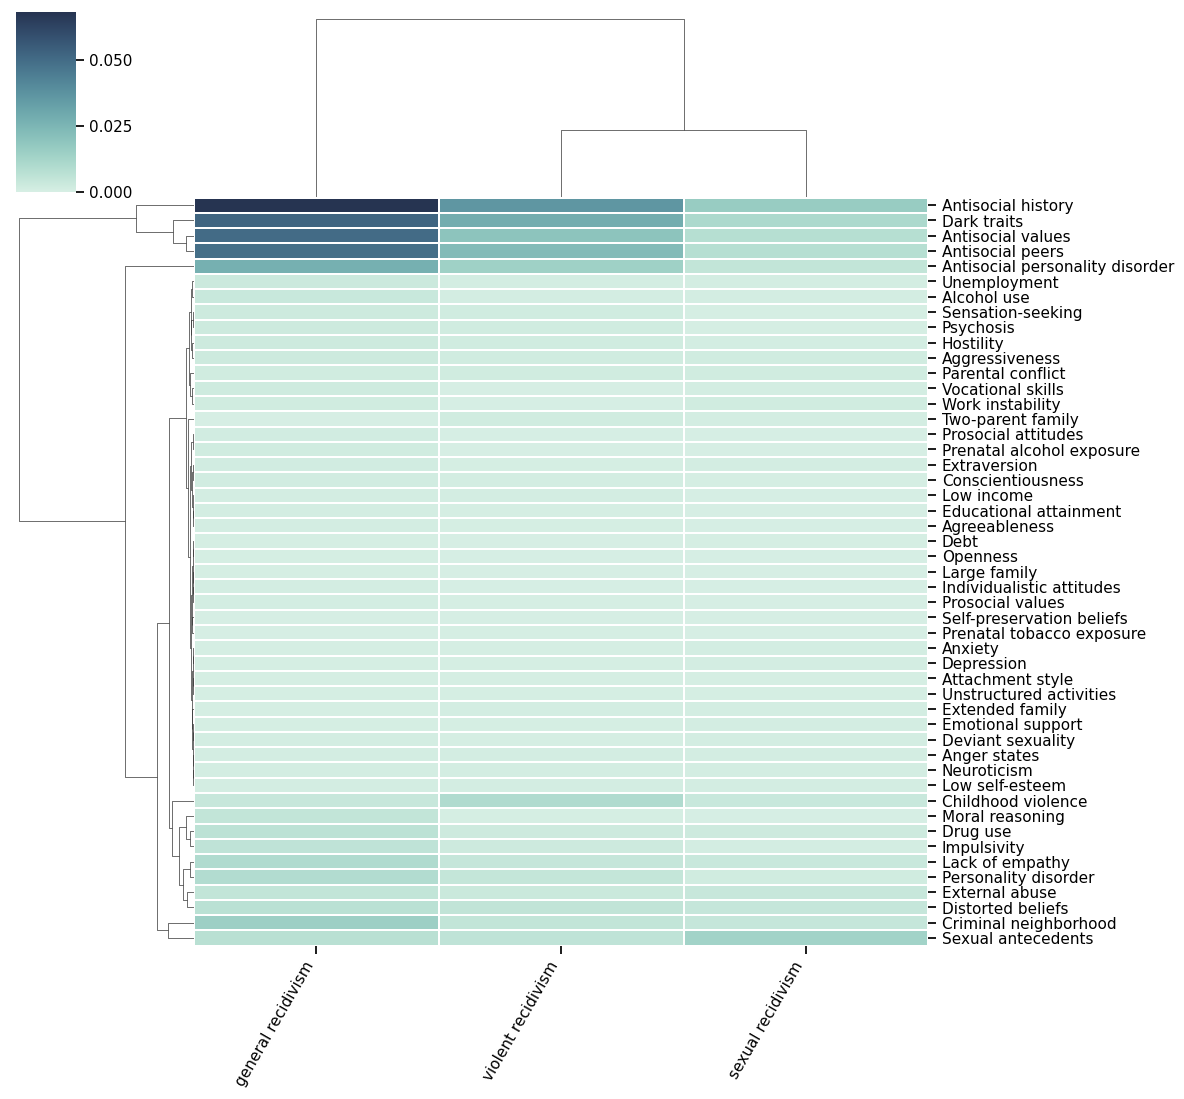

In [124]:
import numpy as np
print("NaN en la matriu?", np.isnan(counts.score).any())
print("Inf en la matriu?", np.isinf(counts.score).any())

counts.score = np.nan_to_num(counts.score, nan=0.0, posinf=1e10, neginf=-1e10)


# Plot a clustermap, clustering risk factors and terms based on similarity
plot_clustermap(counts, attribute='score', cmap='blue', metric='euclidean',
                linewidths=matrix_linewidths, figsize=(12, 10),
                save_fig=SAVE_FIG, file_name=name + '_clustermap' + SAVE_EXT,
                directory=figs_dir, save_kwargs={'transparent' : True})


### Similarity Measure

In [125]:
# Calculate similarity between all risk factors (based on term association percents)
counts.compute_score('similarity', 'A')

/Users/davidgallardo-pujol/Documents/GitHub/ViolentRiskFactors/.venv/lib/python3.9/site-packages/lisc/analysis/counts.py:121: RuntimeWarning: divide by zero encountered in divide
  inv_square_mag = 1 / np.diag(similarity)


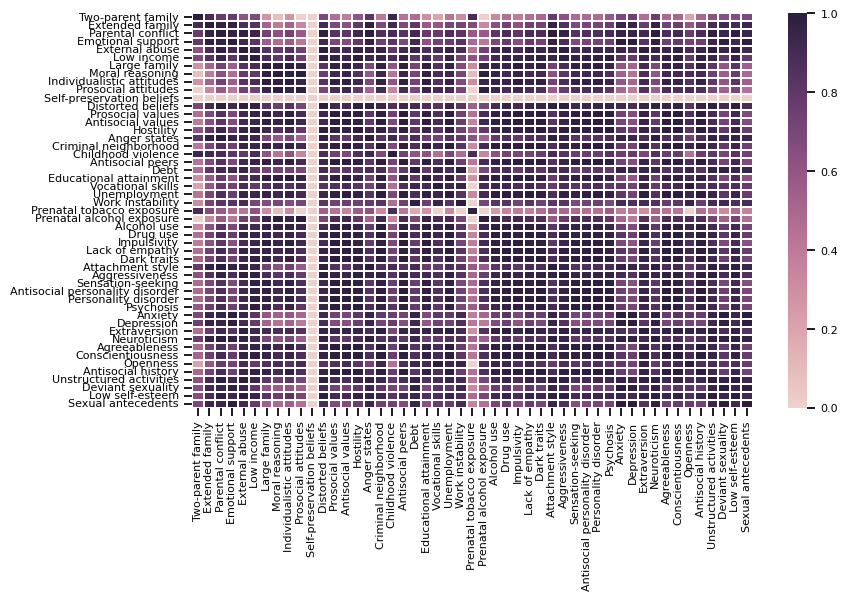

In [126]:
# Plot similarity matrix between risk factors
plot_matrix(counts, linewidths=matrix_linewidths, figsize=(10, 7),
            save_fig=SAVE_FIG, file_name=name + '_similarity' + SAVE_EXT,
            directory=figs_dir, save_kwargs={'transparent' : True})

fig = plt.gcf()  # get current figure
for ax in fig.axes:
    plt.setp(ax.get_xticklabels(), fontsize=8)
    plt.setp(ax.get_yticklabels(), fontsize=8)

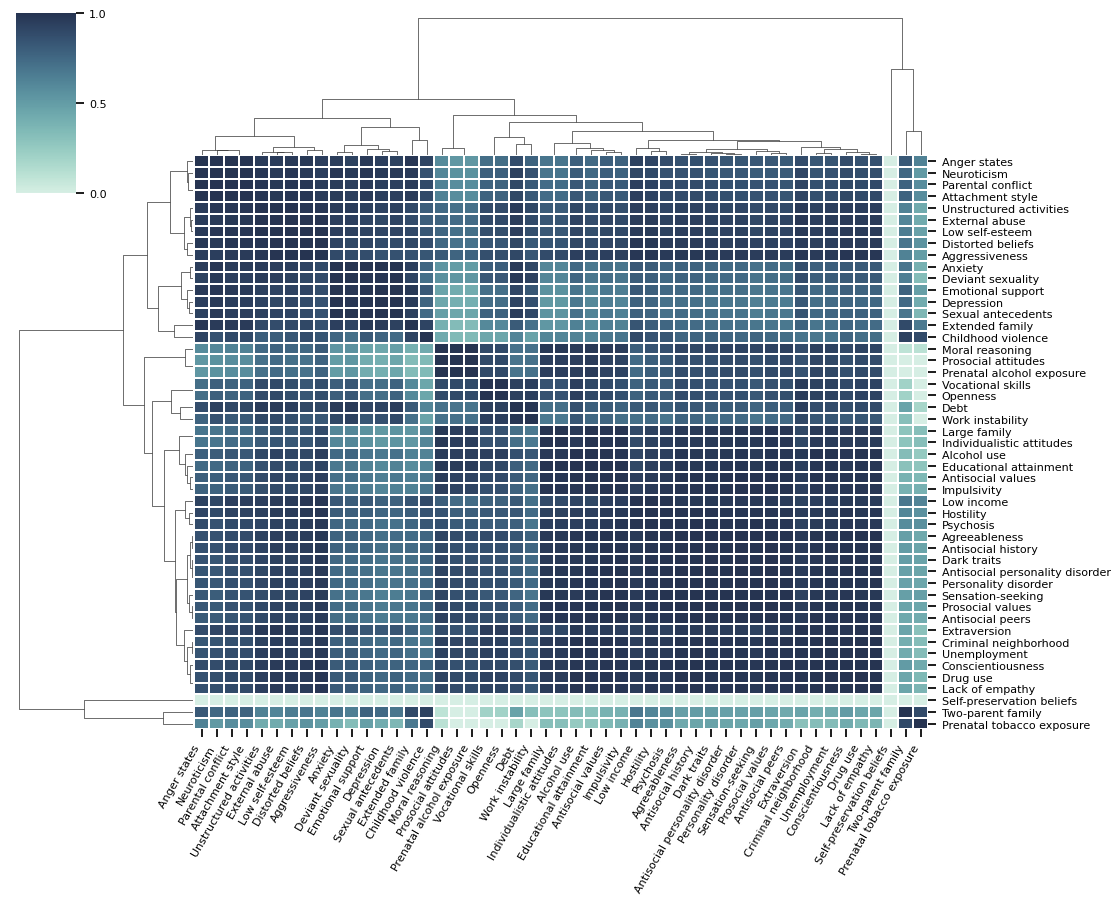

In [127]:
# Plot a clustermap, clustering risk factors based on similarity
plot_clustermap(counts, attribute='score', cmap='blue', 
                metric='euclidean',  # Afegir aquest argument
                linewidths=matrix_linewidths, figsize=(12, 10),
                save_fig=SAVE_FIG, file_name=name + '_similarity_cluster' + SAVE_EXT,
                directory=figs_dir, save_kwargs={'transparent' : True})

fig = plt.gcf()  # get current figure
for ax in fig.axes:
    plt.setp(ax.get_xticklabels(), fontsize=8)
    plt.setp(ax.get_yticklabels(), fontsize=8)

### Association Score

In [128]:
# Calculate association between all ERPs
counts.compute_score('association')

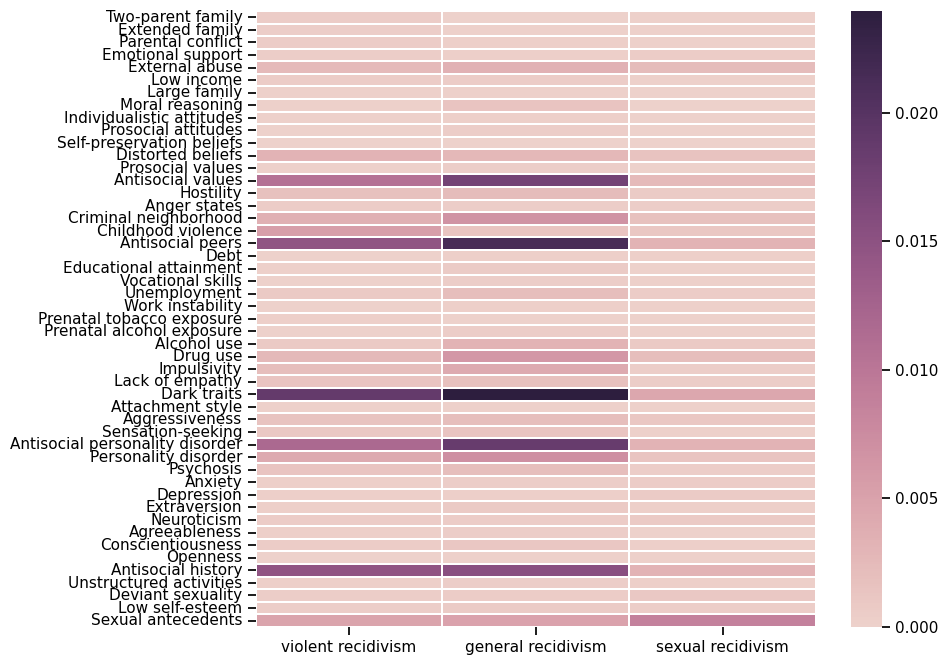

In [129]:
# Plot similarity matrix between terms
plot_matrix(counts, linewidths=matrix_linewidths, figsize=(10, 7),
            save_fig=SAVE_FIG, file_name=name + '_associations' + SAVE_EXT,
            directory=figs_dir, save_kwargs={'transparent' : True})

### Dendrograms

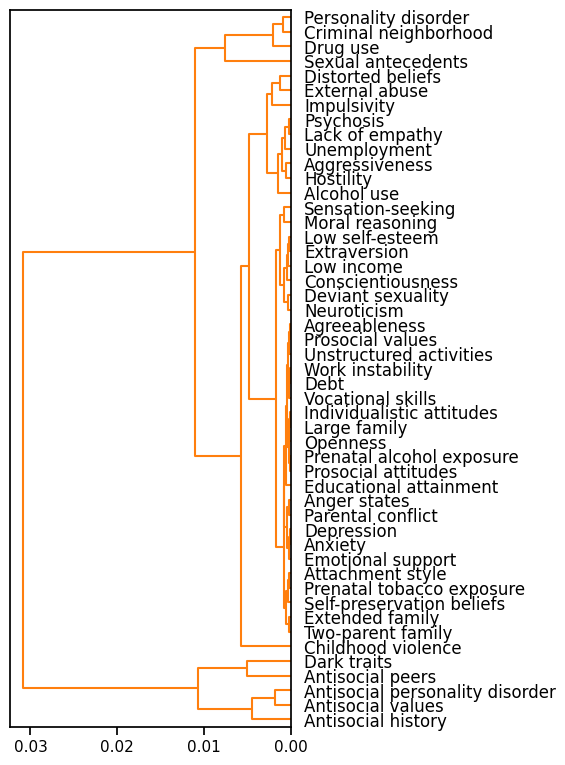

In [130]:
# Plot dendrogram of risk factors, based on percent associations with terms
plot_dendrogram(counts, attribute='score', figsize=(6, 8),
                metric='euclidean',
                save_fig=SAVE_FIG, file_name=name + '_erp_dendro' + SAVE_EXT,
                directory=figs_dir, save_kwargs={'transparent': True})

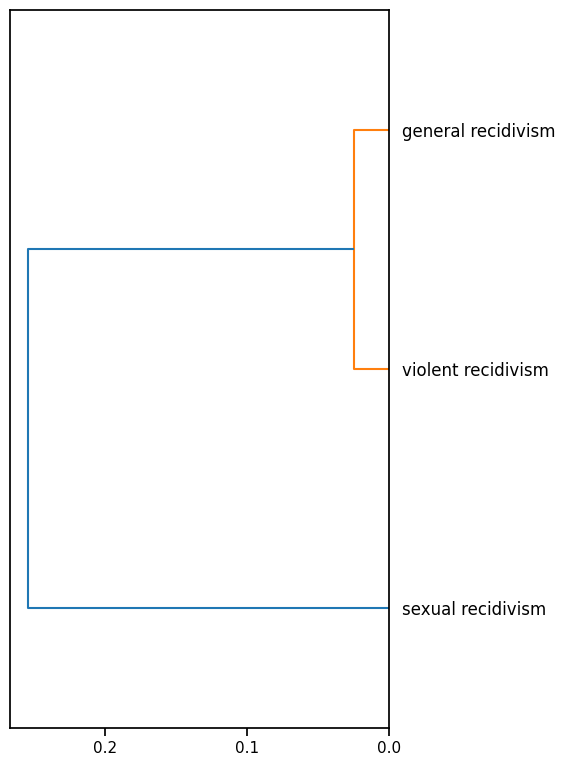

In [131]:
# Plot dendrogram of termss, based on percent associations with risk factors
plot_dendrogram(counts, attribute='score', transpose=True, figsize=(6, 8),
                save_fig=SAVE_FIG, file_name=name + '_term_dendro' + SAVE_EXT,
                directory=figs_dir, save_kwargs={'transparent' : True})